# Sumowanie liczb pojedynczej precyzji

In [3]:
from numpy import float32
from matplotlib import pyplot as plt
import time

In [4]:
def absolute_error(number, approximation):
    return abs(number - approximation)


def relative_error(number, approximation):
    return abs(number - approximation) / number


def iterative_sum(tab):
    sum = float32(0)
    for i in tab:
        sum += i
    return sum

In [6]:
val = float32(0.53125)
numbers = [val] * 10 ** 7
sum32 = iterative_sum(numbers)
original_sum = val * 10 ** 7

print('Wartość prawidłowa: ', original_sum)
print('Wartość uzyskana po zsumowaniu:', sum32)
print('Błąd bezwzględny:', absolute_error(original_sum, sum32))
print('Błąd względny:', relative_error(original_sum, sum32) * 100, '%')

Wartość prawidłowa:  5312500.0
Wartość uzyskana po zsumowaniu: 5030840.5
Błąd bezwzględny: 281659.5
Błąd względny: 5.301825882352941 %


Błąd względny jest tak duży, ponieważ dodajemy bardzo małą liczbę do coraz większej sumy.

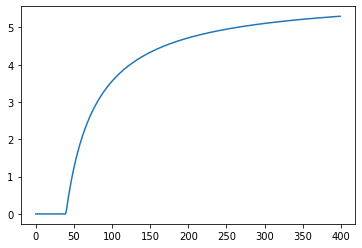

In [19]:
def relative_error_plot(numbers):
    sum = float32(0)
    sum2 = 0
    x = 0
    tab = []
    for i in numbers:
        sum += i
        sum2 += i
        if x % 25000 == 0:
            tab.append(relative_error(sum2, sum) * 100)
        x += 1
    plt.plot(tab)
    plt.show()
relative_error_plot(numbers)

In [9]:
def recursive_sum(xs):
    length = len(xs)
    if length == 0:
        return 0
    if length == 1:
        return xs[0]
    else:
        return recursive_sum(xs[:length//2]) + recursive_sum(xs[length//2:])
sum3 = recursive_sum(numbers)

In [18]:
print('Wartość prawidłowa: ', original_sum)
print('Suma obliczona rekurencyjnie: ', sum3)
print('Błąd bezwzględny: ', absolute_error(original_sum, sum3))
print('Błąd względny: ', relative_error(original_sum, sum3) * 100, '%')

Wartość prawidłowa:  5312500.0
Suma obliczona rekurencyjnie:  5312500.0
Błąd bezwzględny:  0.0
Błąd względny:  0.0 %


Błąd względny jest równy 0 %, ponieważ rekurencyjnie dodajemy do siebie bardzo podobne liczby. Bity mantysy nie są tracone.

Jednak jeżeli w tablicy będą obok siebie liczby bardzo duże i bardzo małe to błąd wzrośnie.

In [23]:
def not_zero_error():
    x = float32(0.0001)
    y = float32(10000)
    numbers2 = []
    sum64 = float(0)
    for i in range(10 ** 7 + 1):
        if i % 2 == 0:
            numbers2.append(x)
            sum64 += x
        else:
            numbers2.append(y)
            sum64 += y
    sum4 = recursive_sum(numbers2)
    print('Suma obliczona rekurencyjnie: ', sum4)
    print('Wartość prawidłowa: ', sum64)
    print('Błąd bezwzględny: ', absolute_error(sum64, sum4))
    print('Błąd względny: ', relative_error(sum64, sum4) * 100, '%')
not_zero_error()

Suma obliczona rekurencyjnie:  50000003000.0
Wartość prawidłowa:  50000000496.69094
Błąd bezwzględny:  2575.3090591430664
Błąd względny:  5.150618067120826e-06 %


In [14]:
def Kahan_sum (tab, function):
    sum = function(0.0)
    err = function(0.0)
    for i in tab:
        y = function(i - err)
        tmp = function(sum + y)
        err = function((tmp - sum) - y)
        sum = tmp
    return sum
# (tmp - sum) odzyskuje wyższe bity y; 
#odjęcie y odzyskuje niższe bity y; zatem err zawiera utracone niskie bity
kahan_sum = Kahan_sum(numbers, float32)
original_sum = val * 10 ** 7

In [15]:
print('Błąd bezwzględny: ', absolute_error(original_sum, kahan_sum))
print('Błąd względny: ', relative_error(original_sum, kahan_sum) * 100, '%')

Błąd bezwzględny:  0.0
Błąd względny:  0.0 %


In [17]:
def compare_time():
    start = time.time() * 1000
    iterative_sum(numbers)
    end = time.time() * 1000
    time_sum1 = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej iteracyjnie: {time_sum1} milisekund")
    start = time.time() * 1000
    Kahan_sum(numbers, float32)
    end = time.time() * 1000
    time_sum1 = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej algorytmem Kahana: {time_sum1} milisekund")
    start = time.time() * 1000
    recursive_sum(numbers)
    end = time.time() * 1000
    time_recursive_sum = (end - start).__round__(2)
    print(f"Czas dla sumy obliczonej rekurencyjnie: {time_recursive_sum} milisekund")
compare_time()

Czas dla sumy obliczonej iteracyjnie: 1253.96 milisekund
Czas dla sumy obliczonej algorytmem Kahana: 20165.82 milisekund
Czas dla sumy obliczonej rekurencyjnie: 10895.82 milisekund
